Closed World scenario

In [ ]:
import pickle # 객체 입출력을 위한 라이브러리
from sklearn.model_selection import train_test_split # 훈련 데이터, 테스트 데이터 분리
from sklearn.preprocessing import StandardScaler # 정규화
from sklearn.ensemble import RandomForestClassifier # 랜덤포레스트 분류 알고리즘
import pandas as pd
from sklearn.decomposition import PCA

# 모델 평가를 위한 metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# monitored dataset 불러오기 -> 유미가 보낸 csv? 에다가 해당되는class label도 같이 나오게 csv 새로 받아야할
monitored=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/closed.csv")
monitored.head()

,N_in_packets,N_out_packets,in_first_thirty,out_first_thirty,out_fraction,in_fraction,out_std,in_std,out_mean,in_mean,N_packets,time_fraction,sum_N,y
0,1300,121,21,9,0.085151,0.914849,398.486335,515.483953,705.106154,774.322314,1421,140.138067,2842,0
1,438,80,22,8,0.154440,0.845560,150.591146,139.231951,265.406393,227.162500,518,50.984252,1036,0
2,1240,118,23,7,0.086892,0.913108,381.878642,472.735508,669.259677,787.110169,1358,122.232223,2716,0
3,1324,122,21,9,0.084371,0.915629,406.205288,513.916038,714.503021,821.139344,1446,108.233533,2892,0
4,1291,115,22,8,0.081792,0.918208,395.028889,503.993490,695.740511,790.608696,1406,132.142857,2812,0


In [ ]:

# 정답값 아닌 애들 분리
X= monitored.drop('y', axis=1)
# 목표변수 분리(정답값. 어느 클래스 label에 해당하는지 해당 열)
y = monitored['y']


In [ ]:
# train, test 데이터 분리

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3, random_state = 1)

# 데이터 스케일링(normalize data)

# 표준 스케일러(평균 0, 분산 1)
#scaler = StandardScaler()
#X_train= scaler.fit_transform(X_train)
#X_test= scaler.fit_transform(X_test)

In [ ]:
# PCA를 사용하여 데이터 차원 축소
#n_components = 0  # 상황에 따라 조절
#pca = PCA(n_components=n_components)
#X_train = pca.fit_transform(X_train)
#X_test = pca.transform(X_test)

In [ ]:
clf2 = RandomForestClassifier(n_estimators=200, criterion="gini", max_depth=30, min_samples_split=2, min_samples_leaf=1, random_state=0)
clf2.fit(X_train, y_train)
y_pred = clf2.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('accuracy_score : ',acc)

accuracy_score :  0.765438596491228


In [ ]:
# GridSearch로 최적의 하이퍼 파라미터 튜닝

from sklearn.model_selection import GridSearchCV

params = {'n_estimators' : [100, 150, 200],
          'max_depth' : [20, 40, 60, 70],
          'min_samples_leaf' : [1, 2, 4, 6],
          'min_samples_split' : [2, 4, 6],
          }


# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state = 221, n_jobs = -1)
grid = GridSearchCV(rf_clf, params, refit = True, verbose = 3, cv=3)
grid.fit(X_train, y_train)

print('최적 하이퍼 파라미터: ', grid.best_params_)


Fitting 3 folds for each of 144 candidates, totalling 432 fits
[CV 1/3] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.747 total time=   6.4s
[CV 2/3] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.735 total time=   6.2s
[CV 3/3] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.741 total time=   4.6s
[CV 1/3] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.751 total time=  10.2s
[CV 2/3] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.737 total time=   6.7s
[CV 3/3] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.743 total time=   9.9s
[CV 1/3] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.750 total time=  14.3s
[CV 2/3] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.739 total time= 

In [ ]:
from sklearn.metrics import classification_report

# 위의 결과로 나온 최적 하이퍼 파라미터로 테스트 세트 데이터에서 예측 성능을 측정

y_pred = grid.predict(X_test)
print('예측 정확도: {:.4f}'.format(grid.best_score_))
print('test 정확도: {:.4f}'.format(accuracy_score(y_test,y_pred)))

# 위에서 출력한 classification_report 결과를 변수에 저장
report = classification_report(y_test, y_pred)

# classification_report 결과를 출력
print('Classification Report:\n', report)

# classification_report 결과를 DataFrame으로 변환
report_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()

# 클래스 별로 precision, recall, f1-score, support의 평균 계산
average_metrics = report_df.mean().to_frame().transpose()

# 평균 출력
print('Average Metrics:\n', average_metrics)

예측 정확도: 0.7454
test 정확도: 0.7670
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.58      0.64        60
           1       0.75      0.67      0.71        63
           2       0.76      0.88      0.81        57
           3       0.88      0.90      0.89        58
           4       0.82      0.78      0.80        63
           5       0.89      0.90      0.90        52
           6       0.84      0.88      0.86        56
           7       0.70      0.95      0.81        60
           8       0.74      0.86      0.80        50
           9       0.71      0.78      0.74        68
          10       0.83      0.72      0.77        53
          11       0.69      0.67      0.68        51
          12       0.84      0.92      0.88        52
          13       0.63      0.49      0.55        67
          14       0.73      0.63      0.68        70
          15       0.76      0.88      0.82        59
          16       0.78  

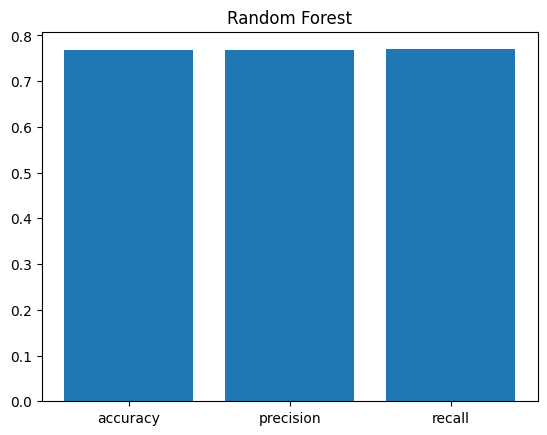

In [ ]:
import matplotlib.pyplot as plt
def print_graph(y_test, pred=None, pred_proba=None):
    accuracy = accuracy_score(y_test , pred) # 정확도
    precision = precision_score(y_test , pred, average='macro') # 정밀도
    recall = recall_score(y_test , pred, average='macro') # 재현도
    estimation=['accuracy','precision','recall']
    value=[accuracy, precision, recall]
    plt.bar(estimation, value)
    plt.title('Random Forest')
    plt.show()

print_graph(y_test,y_pred)

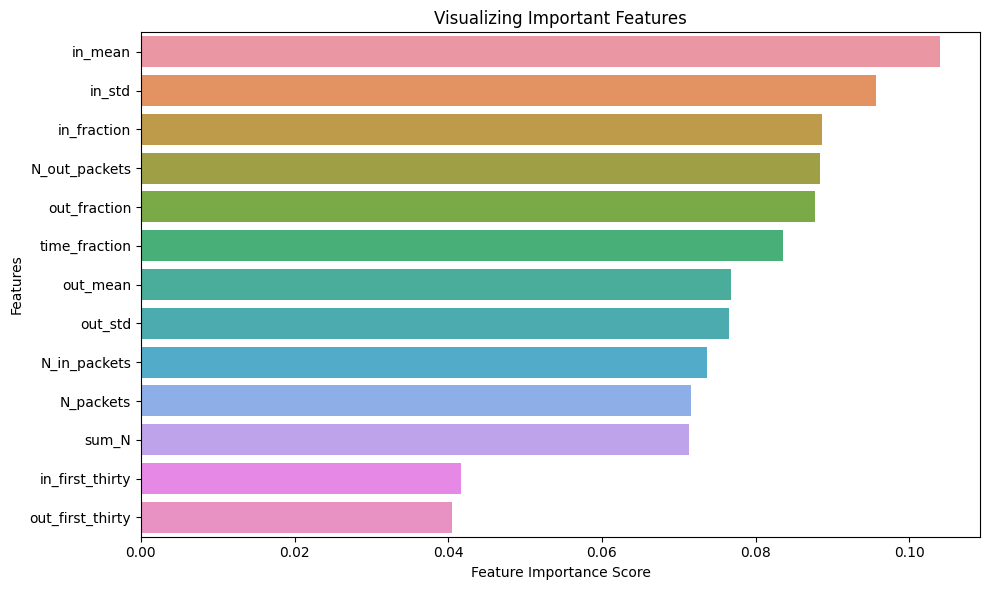

In [ ]:
# 5. Report the feature rankings with importance scores using the bar plot using barplot provided by seaborn library.

import seaborn as sns
import matplotlib.pyplot as plt


feature_imp = pd.Series(grid.best_estimator_.feature_importances_, index=column_headers).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.tight_layout()

Open world (binary)

In [ ]:
import pickle # 객체 입출력을 위한 라이브러리
from sklearn.model_selection import train_test_split # 훈련 데이터, 테스트 데이터 분리
from sklearn.preprocessing import StandardScaler # 정규화
from sklearn.ensemble import RandomForestClassifier # 랜덤포레스트 분류 알고리즘
import pandas as pd

# 모델 평가를 위한 metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
binary_concat=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/open_binary.csv")
binary_concat.head()

,N_in_packets,N_out_packets,in_first_thirty,out_first_thirty,out_fraction,in_fraction,out_std,in_std,out_mean,in_mean,N_packets,time_fraction,sum_N,y
0,1300,121,21,9,0.085151,0.914849,398.486335,515.483953,705.106154,774.322314,1421,140.138067,2842,1
1,438,80,22,8,0.154440,0.845560,150.591146,139.231951,265.406393,227.162500,518,50.984252,1036,1
2,1240,118,23,7,0.086892,0.913108,381.878642,472.735508,669.259677,787.110169,1358,122.232223,2716,1
3,1324,122,21,9,0.084371,0.915629,406.205288,513.916038,714.503021,821.139344,1446,108.233533,2892,1
4,1291,115,22,8,0.081792,0.918208,395.028889,503.993490,695.740511,790.608696,1406,132.142857,2812,1


In [ ]:
# 정답값 아닌 애들 분리
X= binary_concat.drop('y', axis=1)
# 목표변수 분리(정답값. 어느 클래스 label에 해당하는지 해당 열)
y = binary_concat['y']

In [ ]:
# train, test 데이터 분리

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3, random_state = 1)

# 데이터 스케일링(normalize data)

 #표준 스케일러(평균 0, 분산 1)
#scaler = StandardScaler()
#X_train= scaler.fit_transform(X_train)
#X_test= scaler.fit_transform(X_test)

In [ ]:
rf_clf2 = RandomForestClassifier(n_estimators=100, max_depth=20, min_samples_leaf=1,
                                 min_samples_split=2, random_state=0)
rf_clf2.fit(X_train , y_train)
pred = rf_clf2.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

예측 정확도: 0.8416


In [ ]:
# GridSearch로 최적의 하이퍼 파라미터 튜닝

from sklearn.model_selection import GridSearchCV

params = {'n_estimators' : [100, 150, 200],
          'max_depth' : [30, 50, 70],
          'min_samples_leaf' : [1,5,10],
          'min_samples_split' : [ 2, 5, 8],
          }


# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf_bi = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
grid_cv_bi = GridSearchCV(rf_clf_bi , param_grid=params , cv=3, n_jobs=-1 )
grid_cv_bi.fit(X_train , y_train)

print('최적 하이퍼 파라미터:\n', grid_cv_bi.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv_bi.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
최고 예측 정확도: 0.8362


In [ ]:
from sklearn.metrics import classification_report

# 위의 결과로 나온 최적 하이퍼 파라미터로 테스트 세트 데이터에서 예측 성능을 측정

y_pred = grid_cv_bi.predict(X_test)
print('예측 정확도: {:.4f}'.format(grid_cv_bi.best_score_))
print('test 정확도: {:.4f}'.format(accuracy_score(y_test,y_pred)))

# 위에서 출력한 classification_report 결과를 변수에 저장
report = classification_report(y_test, y_pred)

# classification_report 결과를 출력
print('Classification Report:\n', report)

# classification_report 결과를 DataFrame으로 변환
report_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()

# 클래스 별로 precision, recall, f1-score, support의 평균 계산
average_metrics = report_df.mean().to_frame().transpose()

# 평균 출력
print('Average Metrics:\n', average_metrics)

예측 정확도: 0.8362
test 정확도: 0.8447
Classification Report:
               precision    recall  f1-score   support

          -1       0.81      0.71      0.76      2967
           1       0.86      0.91      0.89      5733

    accuracy                           0.84      8700
   macro avg       0.83      0.81      0.82      8700
weighted avg       0.84      0.84      0.84      8700

Average Metrics:
    precision    recall  f1-score      support
0   0.838424  0.825333  0.830311  5220.168943


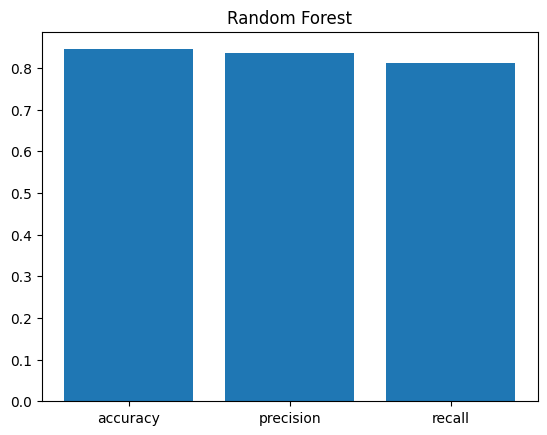

In [ ]:
def print_graph(y_test, pred=None, pred_proba=None):
    accuracy = accuracy_score(y_test , pred) # 정확도
    precision = precision_score(y_test , pred, average='macro') # 정밀도
    recall = recall_score(y_test , pred, average='macro') # 재현도
    estimation=['accuracy','precision','recall']
    value=[accuracy, precision, recall]
    plt.bar(estimation, value)
    plt.title('Random Forest')
    plt.show()

print_graph(y_test,y_pred)


In [ ]:
# feature names 뽑기(header 제외)
a=binary_concat.drop(['y'], axis=1)
column_headers=list(a.columns.values)

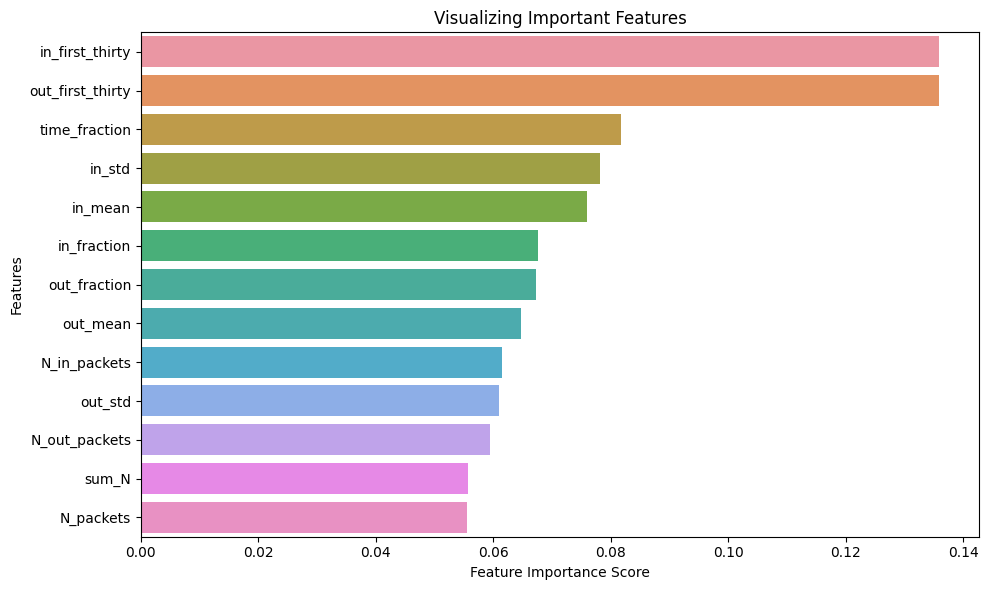

In [ ]:
# 5. Report the feature rankings with importance scores using the bar plot using barplot provided by seaborn library.

import seaborn as sns
import matplotlib.pyplot as plt

best_params=grid_cv_bi.best_params_
best_rf_clf = RandomForestClassifier(**best_params)
best_rf_clf.fit(X_train, y_train)
#accuracy = best_rf_clf.score(X_test, y_test)
#print("모델 재훈련 테스트 정확도:", accuracy)

feature_imp = pd.Series(best_rf_clf.feature_importances_, index=column_headers).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.tight_layout()

Open World (multi)

In [ ]:
import pickle # 객체 입출력을 위한 라이브러리
from sklearn.model_selection import train_test_split # 훈련 데이터, 테스트 데이터 분리
from sklearn.preprocessing import StandardScaler # 정규화
from sklearn.ensemble import RandomForestClassifier # 랜덤포레스트 분류 알고리즘
import pandas as pd
#from sklearn.decomposition import PCA

# 모델 평가를 위한 metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [ ]:
# monitored label=0~95 / unmonitored label=-1로 한 dataset 불러오기
multi=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/open_multi.csv")
multi.head()

,N_in_packets,N_out_packets,in_first_thirty,out_first_thirty,out_fraction,in_fraction,out_std,in_std,out_mean,in_mean,N_packets,time_fraction,sum_N,y
0,1300,121,21,9,0.085151,0.914849,398.486335,515.483953,705.106154,774.322314,1421,140.138067,2842,0
1,438,80,22,8,0.154440,0.845560,150.591146,139.231951,265.406393,227.162500,518,50.984252,1036,0
2,1240,118,23,7,0.086892,0.913108,381.878642,472.735508,669.259677,787.110169,1358,122.232223,2716,0
3,1324,122,21,9,0.084371,0.915629,406.205288,513.916038,714.503021,821.139344,1446,108.233533,2892,0
4,1291,115,22,8,0.081792,0.918208,395.028889,503.993490,695.740511,790.608696,1406,132.142857,2812,0


In [ ]:
# 정답값 아닌 애들 분리
X= multi.drop('y', axis=1)
# 목표변수 분리(정답값. 어느 클래스 label에 해당하는지 해당 열)
y = multi['y']

In [ ]:
# train, test 데이터 분리

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3, random_state = 1)

# 데이터 스케일링(normalize data)

# 표준 스케일러(평균 0, 분산 1)
#scaler = StandardScaler()
#X_train= scaler.fit_transform(X_train)
#X_test= scaler.fit_transform(X_test)

In [ ]:
# PCA를 사용하여 데이터 차원 축소
#n_components = 0
#pca = PCA(n_components=n_components)
#X_train = pca.fit_transform(X_train)
#X_test = pca.transform(X_test)

In [ ]:
clf2 = RandomForestClassifier(n_estimators=150, criterion="gini", max_depth=20, min_samples_split=2, min_samples_leaf=1, random_state=0)
clf2.fit(X_train, y_train)
y_pred = clf2.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('accuracy_score : ',acc)


accuracy_score :  0.7433333333333333


In [ ]:
# GridSearch로 최적의 하이퍼 파라미터 튜닝

from sklearn.model_selection import GridSearchCV

params = {'n_estimators' : [100, 150, 200],
          'max_depth' : [30, 50, 70],
          'min_samples_leaf' : [1, 2, 4, 6],
          'min_samples_split' : [2, 4, 6],
          }


# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state = 221, n_jobs = -1)
grid = GridSearchCV(rf_clf, params, cv=3, refit = True, verbose = 3)
grid.fit(X_train, y_train)

print('최적 하이퍼 파라미터: ', grid.best_params_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV 1/3] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.725 total time=   8.6s
[CV 2/3] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.726 total time=  10.1s
[CV 3/3] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.722 total time=   8.2s
[CV 1/3] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.726 total time=  14.7s
[CV 2/3] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.727 total time=  14.0s
[CV 3/3] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.723 total time=  11.9s
[CV 1/3] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.726 total time=  20.8s
[CV 2/3] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.727 total time= 

In [ ]:
from sklearn.metrics import classification_report

# 위의 결과로 나온 최적 하이퍼 파라미터로 테스트 세트 데이터에서 예측 성능을 측정

y_pred = grid.predict(X_test)
print('예측 정확도: {:.4f}'.format(grid.best_score_))
print('test 정확도: {:.4f}'.format(accuracy_score(y_test,y_pred)))

# 위에서 출력한 classification_report 결과를 변수에 저장
report = classification_report(y_test, y_pred)

# classification_report 결과를 출력
print('Classification Report:\n', report)

# classification_report 결과를 DataFrame으로 변환
report_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()

# 클래스 별로 precision, recall, f1-score, support의 평균 계산
average_metrics = report_df.mean().to_frame().transpose()

# 평균 출력
print('Average Metrics:\n', average_metrics)

예측 정확도: 0.7256
test 정확도: 0.7479
Classification Report:
               precision    recall  f1-score   support

          -1       0.69      0.89      0.78      2967
           0       0.78      0.50      0.61        62
           1       0.76      0.34      0.47        65
           2       0.84      0.76      0.80        62
           3       0.82      0.67      0.74        63
           4       0.80      0.66      0.72        67
           5       0.88      0.83      0.85        52
           6       0.85      0.89      0.87        65
           7       0.74      0.82      0.78        61
           8       0.74      0.84      0.79        57
           9       0.78      0.71      0.74        75
          10       0.84      0.61      0.71        62
          11       0.76      0.49      0.60        51
          12       0.86      0.93      0.89        70
          13       0.60      0.38      0.46        56
          14       0.71      0.53      0.61        66
          15       0.80  

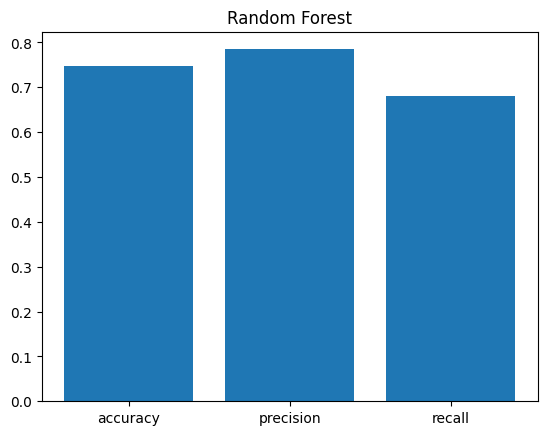

In [ ]:
import matplotlib.pyplot as plt
def print_graph(y_test, pred=None, pred_proba=None):
    accuracy = accuracy_score(y_test , pred) # 정확도
    precision = precision_score(y_test , pred, average='macro') # 정밀도
    recall = recall_score(y_test , pred, average='macro') # 재현도
    estimation=['accuracy','precision','recall']
    value=[accuracy, precision, recall]
    plt.bar(estimation, value)
    plt.title('Random Forest')
    plt.show()

print_graph(y_test,y_pred)

In [ ]:
# feature names 뽑기(header 제외)
a=multi.drop(['y'], axis=1)
column_headers=list(a.columns.values)

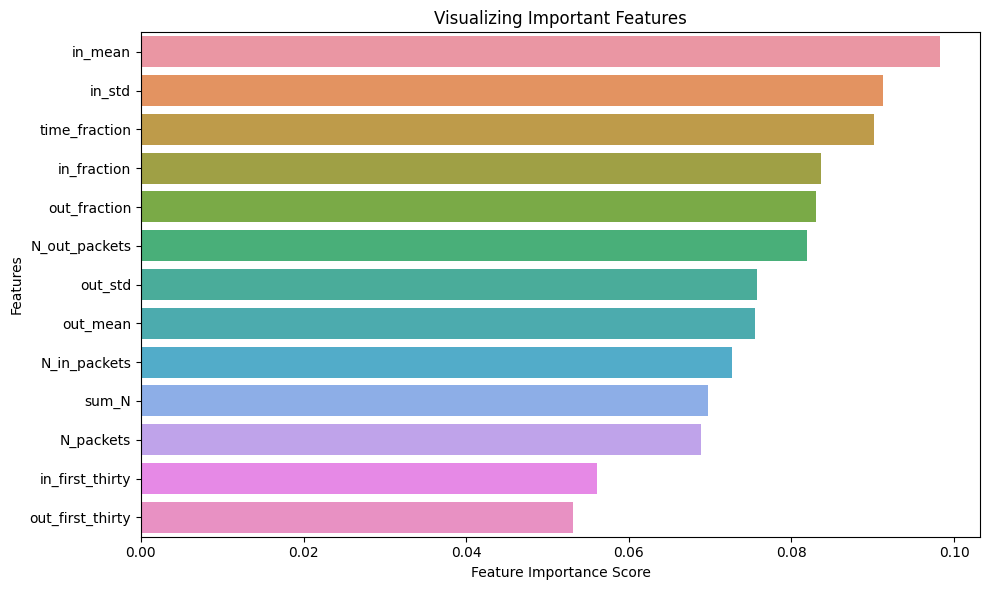

In [ ]:
# 5. Report the feature rankings with importance scores using the bar plot using barplot provided by seaborn library.

import seaborn as sns
import matplotlib.pyplot as plt


feature_imp = pd.Series(grid.best_estimator_.feature_importances_, index=column_headers).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.tight_layout()